# Beispielprogramm: Matrixwertige Exponentialfuntion



Zu einer reellwertigen Matrix betrachten wir ein Anfangswertproblem für die lineare DGL
\begin{align}
\dot {\vec u}(t) &= A {\vec u(t)},\quad t>0\\
\vec u(0)&= \vec u_0
\end{align}
Dessen Lösung ist durch $$\vec u(t) :=   \exp(A t) \vec u_0$$
explizit gegeben. 

In der Vorlesung wurde behandelt, dass das Verhalten der Lösung durch die **Eigenwerte von A** bestimmt ist. Wir konzentrieren uns im folgenden auf den Spezialfall 
$$A := \begin{pmatrix} a & b \\ c & d \end{pmatrix} \in \mathbb R^{2\times 2}$$
Aus diesen Fall kann bereits vieles abgeleitet werden.
Zunächst definieren wir die Matrix (**TODO:** Bitte ggf. ändern!):

In [1]:
A = [0.3 1.0; -1.0 0.3]

A =

   0.30000   1.00000
  -1.00000   0.30000



Die Eigenwerte ergeben sich über die Nullstellen des charakteristischen Polynoms:

$$ 0= det(A - \lambda I)  = \begin{vmatrix} a-\lambda & b \\ c & d-\lambda \end{vmatrix} = (a-\lambda )(d-\lambda )-bc  = \lambda^2 - \lambda (a+b) + (ad - bc)$$
Über die $pq$-Formel sieht man, dass sich entweder (i) zwei reellwertige Eigenwerte $\lambda_1, \lambda_2 \in\mathbb R$
oder (ii) zwei komplex-konjugiert Eigenwerte 
$$\lambda_{1/2} = \alpha \pm i \beta \in \mathbb C,$$
mit Real- und Imaginärteil $\alpha, \beta \in \mathbb R$ ergeben. Wir berechnen diese mit Octave:

In [2]:
[V,Lambda]=eig(A);
Lambda
V

alpha1 =  real(Lambda(1,1))
alpha2 =  real(Lambda(2,2))

beta = abs(imag(Lambda(1,1)))


Lambda =

Diagonal Matrix

   0.3000 + 1.0000i                  0
                  0   0.3000 - 1.0000i

V =

   0.70711 + 0.00000i   0.70711 - 0.00000i
   0.00000 + 0.70711i   0.00000 - 0.70711i

alpha1 =  0.30000
alpha2 =  0.30000
beta =  1


Für den Eigenwert $\lambda = \alpha + i \beta$ folgt mit der Euler'schen Formel die Gleichung
$$
\exp(\lambda t) = \exp(\alpha t) \cdot \exp(i \beta t) =  \exp(\alpha t) \cdot \left( \cos (\beta t) + i \sin (\beta t) \right)
$$
Somit bestimmt: 
* der Realteil $\alpha$ das Wachstumsverhalten $\exp(\alpha t)$, während 
* der Imaginärteil $\beta$ zu Oszillationen $\cos (\beta t)$  bzw. $\sin (\beta t)$ führt.

Entsprechend definieren wir nachfolgend charakteristische **Zeitkonstanten**. Diese sind für Wachstum und Oszillationen durch $1/|Re \lambda|$ bzw. $2 \pi/|Im \lambda|$ gegeben. Um jeweils den langsamsten Prozess auflösen zu können, betrachten wir insgesamt das  Maximum.

In [3]:
tGrowth = abs(1.0/real(Lambda(1,1)))
tGrowth2 = abs(1.0/real(Lambda(2,2)))    

if (beta > 0) 
    # Ein Wachstums-/Zerfallprozess mit Oszillation
    tOscillation = 2.0*pi/beta
    tChar = max(tGrowth,tOscillation)
else
    # Zwei Wachstums-/Zerfallprozesse
    tChar=max(tGrowth, tGrowth2)
endif


tGrowth =  3.3333
tGrowth2 =  3.3333
tOscillation =  6.2832
tChar =  6.2832


Obwohl die Lösung explizite Lösung der DGL bekannt ist, lösen wir numerisch ;-):

In [4]:
function udot=f_rhs(u,t, A)
    udot = A*u;
endfunction

u0 = [10,40];
tdiskret = linspace(0, 4.0*tChar, 500);
uDiskret = lsode(@(u,t) f_rhs(u,t,A), u0, tdiskret);

Wir wollen nun die Lösung auch graphisch darstellen:

In [5]:
# Funktion zur Ausgabe des Vektorfelds
function plot_field_2D(myrhs, spaceX1, spaceX2, name)
	
	 for j=1:length(spaceX2)
    	     for i=1:length(spaceX1)
    	     	 vec = myrhs([spaceX1(i);spaceX2(j)], 0.0);
        	 dX1(j,i) = vec(1);
        	 dX2(j,i) = vec(2); 
    	     end
	end

	quiver(spaceX1,spaceX2,dX1,dX2);
endfunction

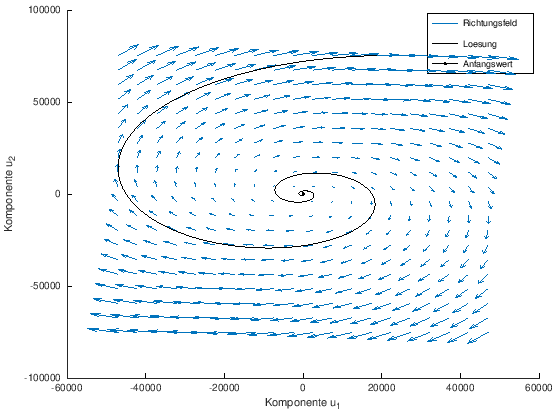

In [6]:
# Plot um Ursprung
min1 = min(uDiskret(:,1));
max1 = max(uDiskret(:,1));
abs1 = max(abs(min1), abs(max1));

min2 = min(uDiskret(:,2));
max2 = max(uDiskret(:,2));
abs2 = max(abs(min2), abs(max2));

spaceX1=linspace(-abs1, abs1, 20);
spaceX2=linspace(-abs2, abs2, 20);

hold on
xlabel("Komponente u_1")
ylabel("Komponente u_2")

plot_field_2D(@(u,t) f_rhs(u,t,A), spaceX1, spaceX2, "Zeitliche Entwicklung")
plot(uDiskret(:,1), uDiskret(:,2), "Color", "black")
plot (u0(1), u0(2), "Color", "black")

legend("Richtungsfeld", "Loesung", "Anfangswert")

Das Vorzeichen von $Re \lambda$ entscheidet darüber, ob ein Wachstums- oder Zerfallsprozess vorliegt. Für komplexe $\lambda$ erhalten wir, je nach Vorzeigen des Realteils, eine gedämpfte ($Re \lambda<0$) oder angefachte ($Re \lambda>0$ ) Schwingung. 

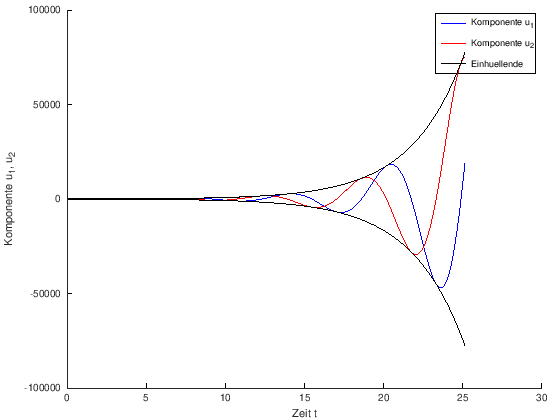

In [7]:
xlabel("Zeit t")
ylabel("Komponente u_1, u_2")

hold on
plot(tdiskret, uDiskret(:,1), "Color", "blue")
plot(tdiskret, uDiskret(:,2), "Color", "red")

# Fuer komplexe Eigenwerte plotten wir die einhuellende Exponentialfunktion
if (beta > 0) 
uGrowth = abs(norm(u0))*exp(tdiskret/tGrowth);
plot(tdiskret, uGrowth, "Color", "Black")
plot(tdiskret, -uGrowth, "Color", "Black")
legend("Komponente u_1", "Komponente u_2", "Einhuellende")
else
legend("Komponente u_1", "Komponente u_2")
endif
